In [15]:
#LIBRAIRIES IMPORTATION
###############################################

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam

In [16]:
#DATA IMPORTATION
###############################################

#Import the data from the data folder
#in the data folder there is two folder one is Testing and another is Training
#in each folder there is 4 other folder one is glioma_tumor,meningioma_tumor,no_tumor and pituitary_tumor
#in each folder there is images of the tumor in a jpg format
#we are going to import the data from the training folder
#we are going to import the data from the testing folder

CATEGORIES = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]
TRAINING_DIR = "H:/Desktop/Machine Learning/CS584-TumorsBrain/data/Training/"
TESTING_DIR = "H:/Desktop/Machine Learning/CS584-TumorsBrain/data/Testing/"
IMG_SIZE = 256


training_data = []
testing_data = []


#This function is going to read the image and convert it into a numpy array
#and then resize the image to 256*256
#and then append the image and the class number to the training_data list if the parameter train is true else append to the testing_data list
def create_data(train = True):
    for category in CATEGORIES:
        if train:
            path = os.path.join(TRAINING_DIR, category)
        else:
            path = os.path.join(TESTING_DIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                if train:
                    training_data.append([new_array, class_num])
                else:
                    testing_data.append([new_array, class_num])
            except Exception as e:
                pass


#We are going to call the create_data function to create the training data and testing data
create_data(train = True)
create_data(train = False)




TRAINING DATA SET:
glioma_tumor:  826
meningioma_tumor:  822
no_tumor:  395
pituitary_tumor:  827
Total number of images:  2870


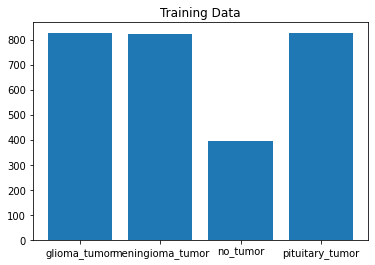


TESTING DATA SET:
glioma_tumor:  100
meningioma_tumor:  115
no_tumor:  105
pituitary_tumor:  74
Total number of images:  394


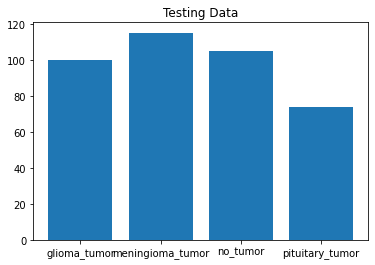


TRAINING DATA SET:


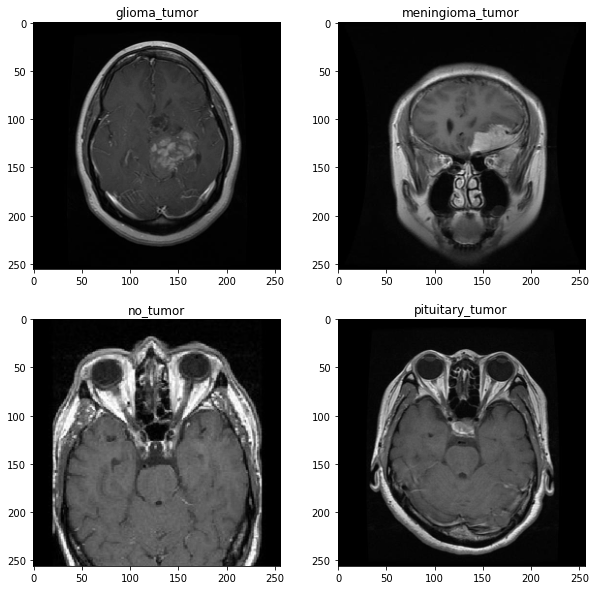

TESTING DATA SET:


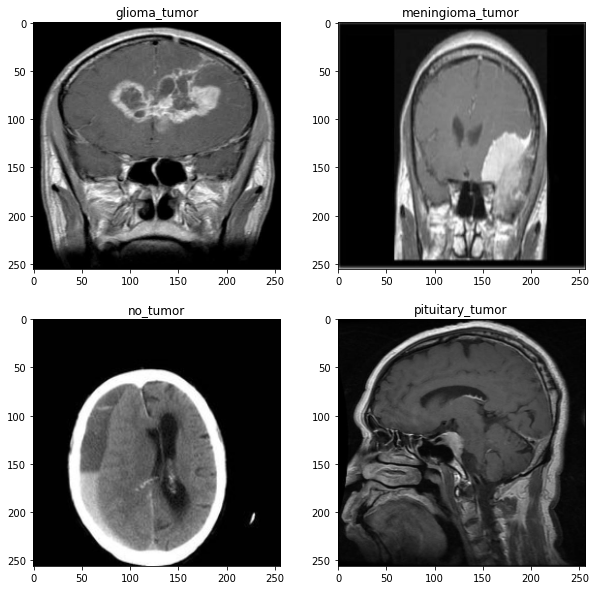

In [17]:
#DATA VISUALIZATION
###############################################

#We are going to visualize the data
#We are going to visualize the training data
#We are going to visualize the testing data

#Visualize the sample number of each class in the training data
def visualize_data(train = True):
    glioma_tumor = 0
    meningioma_tumor = 0
    no_tumor = 0
    pituitary_tumor = 0
    data_set = training_data if train else testing_data
    for features, label in data_set:
        if label == 0:
            glioma_tumor += 1
        elif label == 1:
            meningioma_tumor += 1
        elif label == 2:
            no_tumor += 1
        elif label == 3:
            pituitary_tumor += 1
    data_set_name = "TRAINING" if train else "TESTING"
    print(data_set_name + " DATA SET:")
    print("glioma_tumor: ", glioma_tumor)
    print("meningioma_tumor: ", meningioma_tumor)
    print("no_tumor: ", no_tumor)
    print("pituitary_tumor: ", pituitary_tumor)
    print("Total number of images: ", glioma_tumor + meningioma_tumor + no_tumor + pituitary_tumor)
    plt.bar(["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"], [glioma_tumor, meningioma_tumor, no_tumor, pituitary_tumor])
    if train:
        plt.title("Training Data")
    else:
        plt.title("Testing Data")
    plt.show()
    print("")


#We are going to call the visualize_data function to visualize the training data and testing data
visualize_data(train = True)
visualize_data(train = False)


#We will show one image from each class in the training data
def show_image(train = True):
    data_set = training_data if train else testing_data
    data_set_name = "TRAINING" if train else "TESTING"
    print(data_set_name + " DATA SET:")
    #make a 4*4 grid and big size of each image
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    #glioma_tumor
    for features, label in data_set:
        if label == 0:
            axs[0, 0].imshow(features, cmap = "gray")
            axs[0, 0].set_title("glioma_tumor")
            break
    #meningioma_tumor
    for features, label in data_set:
        if label == 1:
            axs[0, 1].imshow(features, cmap = "gray")
            axs[0, 1].set_title("meningioma_tumor")
            break
    #no_tumor
    for features, label in data_set:
        if label == 2:
            axs[1, 0].imshow(features, cmap = "gray")
            axs[1, 0].set_title("no_tumor")
            break
    #pituitary_tumor
    for features, label in data_set:
        if label == 3:
            axs[1, 1].imshow(features, cmap = "gray")
            axs[1, 1].set_title("pituitary_tumor")
            break
    plt.show()


#We are going to call the show_image function to show one image from each class in the training data and testing data
show_image(train = True)
show_image(train = False)


In [18]:
#DATA PREPROCESSING
###############################################

#We are going to shuffle the training data and testing data
#We are going to separate the features and the labels for the training data and testing data
#We are going to split the training data into training data and validation data
#We are going to normalize the training, validation and testing data and one-hot encode the labels

############################################################################################################
# - Shuffle the training data and testing data

#We are going to shuffle the training data
random.shuffle(training_data)
#We are going to shuffle the testing data
random.shuffle(testing_data)

############################################################################################################
# - Separate the features and the labels for the training data and testing data

#We are going to separate the features and the labels for the training data
x_train = []
y_train = []
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)
#We are going to separate the features and the labels for the testing data
x_test = []
y_test = []
for features, label in testing_data:
    x_test.append(features)
    y_test.append(label)

############################################################################################################
# - Split the training data into training data and validation data

VAL_RATIO = 0.2
val_size = int(len(x_train) * VAL_RATIO)
x_val = x_train[:val_size]
y_val = y_train[:val_size]
x_train = x_train[val_size:]
y_train = y_train[val_size:]

############################################################################################################
# - Normalize the training, validation and testing data and one-hot encode the labels

#We are going to normalize the training data by dividing it by 255
x_train = np.array(x_train) / 255
#We are going to normalize the validation data
x_val = np.array(x_val) / 255
#We are going to normalize the testing data
x_test = np.array(x_test) / 255

#We are going to convert the labels to one-hot vectors
y_train = to_categorical(y_train, num_classes = 4)
y_val = to_categorical(y_val, num_classes = 4)
y_test = to_categorical(y_test, num_classes = 4)


In [ ]:
    epochs = {{choice([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])}}
    #We are going to use hyperas to find the best batch size
    batch_size = {{choice([16, 32, 64, 128, 256])}}
    #We are going to use hyperas to find the best learning rate
    learning_rate = {{uniform(0, 1)}}
    #We are going to use hyperas to find the best optimizer
    optimizer = {{choice(['adam', 'rmsprop', 'sgd'])}}
    #We are going to use hyperas to find the best activation function
    activation = {{choice(['relu', 'elu', 'selu', 'tanh', 'sigmoid'])}}
    #We are going to use hyperas to find the best number of neurons in the hidden layer
    neurons = {{choice([16, 32, 64, 128, 256, 512, 1024])}}
    #We are going to use hyperas to find the best dropout rate
    dropout_rate = {{uniform(0, 1)}}
    #We are going to use hyperas to find the best number of layers
    num_layers = {{choice([1, 2, 3, 4, 5])}}
    #We are going to use hyperas to find the best number of neurons in each layer
    neurons_1 = {{choice([16, 32, 64, 128, 256, 512, 1024])}}
    neurons_2 = {{choice([16, 32, 64, 128, 256, 512, 1024])}}
    neurons_3 = {{choice([16, 32, 64, 128, 256, 512, 1024])}}
    neurons_4 = {{choice([16, 32, 64, 128, 256, 512, 1024])}}
    neurons_5 = {{choice([16, 32, 64, 128, 256, 512, 1024])}}
    #We are going to use hyperas to find the best batch normalization
    batch_normalization = {{choice([True, False])}}
    #We are going to use hyperas to find the best kernel initializer
    kernel_initializer = {{choice(['glorot_uniform', 'he_uniform', 'lecun_uniform', 'glorot_normal', 'he_normal', 'lecun_normal'])}}
    #We are going to use hyperas to find the best kernel regularizer
    kernel_regularizer = {{choice(['l1', 'l2', 'l1_l2'])}}
    #We are going to use hyperas to find the best bias regularizer
    bias_regularizer = {{choice(['l1', 'l2', 'l1_l2'])}}

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 65536)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               8388736   
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 4)                 260       
                                                                 
Total params: 8,397,252
Trainable params: 8,397,252
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
72/72 [==============================] - 8s 97ms/step - loss: 1.4312 - accuracy: 0.5283 - val_loss: 0.8781 - val_accuracy: 0.6115
Epoch 2/20
72/72 [=================

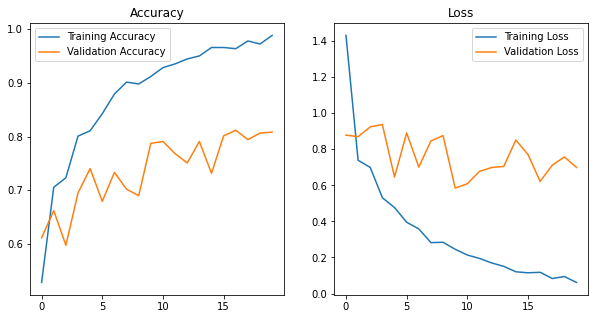

In [21]:
#FIRST MODEL: A SIMPLE NEURAL NETWORK
###############################################

#We are going to build a simple neural network model
#We are going to train the model
#We are going to evaluate the model

############################################################################################################
# - Build a simple neural network model

#We are going to build a simple neural network model
model = Sequential()
model.add(Flatten(input_shape = (IMG_SIZE, IMG_SIZE)))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(4, activation = "softmax"))
model.summary()

############################################################################################################
# - Train the model

#We are going to compile the model
model.compile(optimizer = Adam(learning_rate = 0.0005), loss = "categorical_crossentropy", metrics = ["accuracy"])
#We are going to train the model
history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_val, y_val))

############################################################################################################
# - Evaluate the model

#We are going to evaluate the model
model.evaluate(x_test, y_test)

#We are going to plot the training and validation accuracy and loss
def plot_accuracy_loss(history):
    plt.figure(figsize = (10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label = "Training Accuracy")
    plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label = "Training Loss")
    plt.plot(history.history["val_loss"], label = "Validation Loss")
    plt.legend()
    plt.title("Loss")
    plt.show()


#We are going to call the plot_accuracy_loss function to plot the training and validation accuracy and loss
plot_accuracy_loss(history)


